In [ ]:
%matplotlib inline

import env
import lib
env.run_mode = env.MODE_UNITTEST
from data_getter.mssql import MSSQLGetter
from data_getter.oanda import OandaGetter
from data_getter import DataGetter
import plotly.offline
plotly.offline.init_notebook_mode()

import matplotlib.pyplot as plt
from matplotlib import ticker 
import numpy as np
import pandas as pd
import mpl_finance
import matplotlib.dates as md

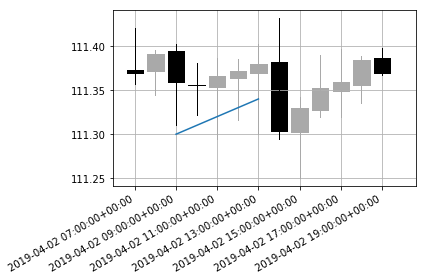

In [16]:
dg = DataGetter(MSSQLGetter(OandaGetter("USD_JPY", "H1")))
    
st = lib.str2epoch("2019/04/02 07:00", "%Y/%m/%d %H:%M")
ed = lib.str2epoch("2019/04/02 20:00", "%Y/%m/%d %H:%M")
dg.retrievePrice(st, ed)

(t, o, h, l, c, v) = dg.getPrice(st, ed)
fig, ax = plt.subplots()
mpl_finance.candlestick2_ohlc(ax, opens=o, closes=c,lows=l, highs=h,
                          width=0.8, colorup='darkgray', colordown='k', alpha=1)

plt.plot([None, None, 111.30, 111.31,111.32,111.33,111.34])

xdate = []
for ep in t:
    xdate.append(lib.epoch2dt(ep))

def mydate(x, pos):
    try:
        return xdate[int(x)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
#ax.format_xdata = md.DateFormatter('%H:%M')
#xtformat = md.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(xtformat)
ax.grid()
fig.autofmt_xdate()
fig.tight_layout()
#plotly.offline.iplot_mpl(fig)